<a href="https://colab.research.google.com/github/NoPParkGGame/MyFirstMachineLearning/blob/main/KNNLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# 농어의 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

# 농어의 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

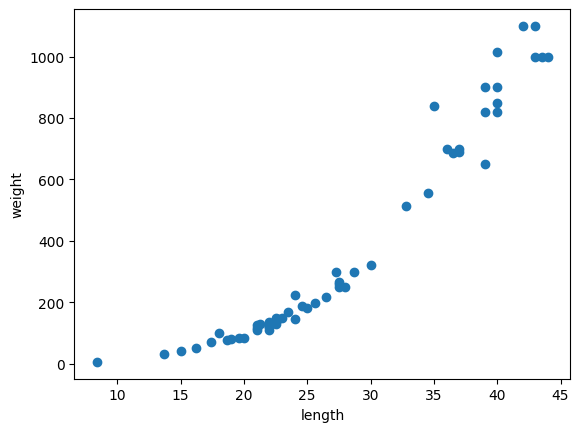

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

print(train_input)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]


In [4]:
# 사이킷런의 훈련 세트는 2차원 배열이어야 함
# 1차원 -> 2차원 벡터로 변환
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.992809406101064


In [6]:
from sklearn.metrics import mean_absolute_error

# 테스트에 대한 예측 제작
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


In [7]:
knr.score(train_input, train_target)
# 테스트 > 훈련 성과 -> 과소적합(<-> 과대적합)

0.9698823289099254

In [8]:
# k 값을 국지적으로 만들어줌
knr.n_neighbors = 1

knr.fit(train_input, train_target)

knr.score(train_input, train_target)

0.9852830341215901

In [9]:
knr.score(test_input, test_target)

0.991309195814175

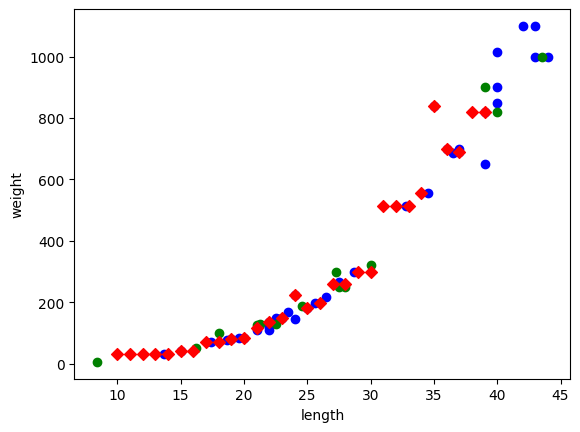

In [10]:
plt.scatter(train_input, train_target, c = 'blue')
plt.scatter(test_input, test_target, c = 'green')
plt.xlabel('length')
plt.ylabel('weight')

# 예측을 잘 하나 확인
for i in range(10, 40):
    new_one = np.array([i])
    new_one.reshape(-1, 1)
    plt.scatter(new_one, knr.predict([new_one]), marker='D', c = 'red')

plt.show()

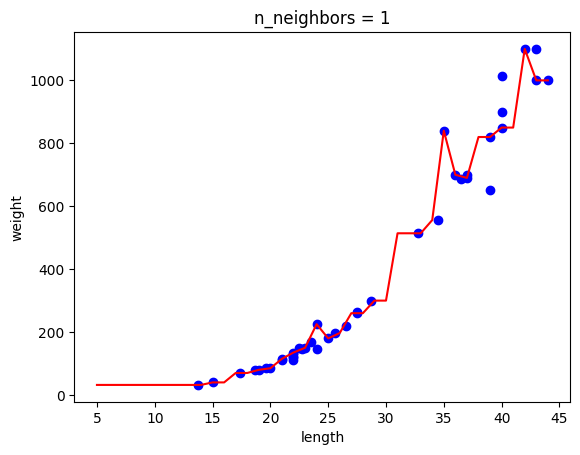

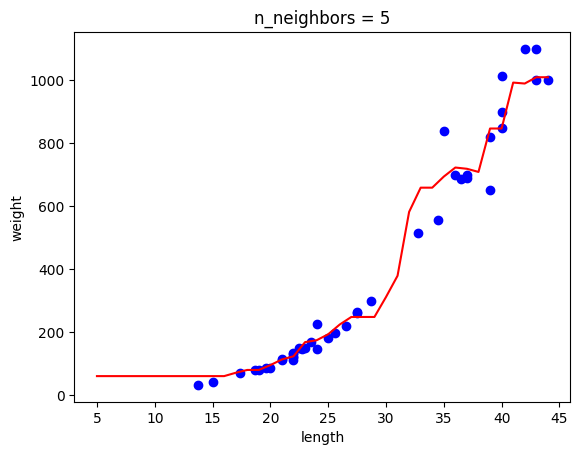

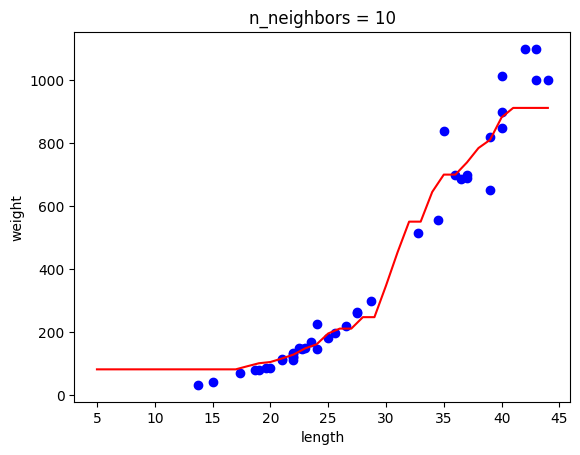

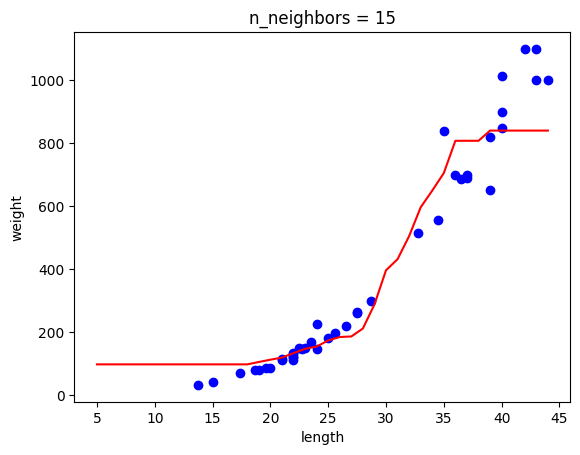

In [12]:

knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10, 15]:

  knr.n_neighbors = n

  knr.fit(train_input, train_target)

  prediction = knr.predict(x)

  plt.scatter(train_input, train_target, c = 'blue')
  plt.plot(x, prediction, c = 'red')
  plt.title(f'n_neighbors = {n}')
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()